## Изучение общей информации

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from functools import reduce
import plotly.graph_objects as go

idxsl = pd.IndexSlice
sns.set(color_codes=True)
from scipy import stats as st

In [219]:
data = pd.read_csv('/datasets/games.csv', index_col = 0)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16715 entries, Wii Sports to Winning Post 8 2016
Data columns (total 10 columns):
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [221]:
data.head()

,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
Name,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


После ознакомления с общей информацией необходимо будет изменить тип данных в ряде столбцов, изменить названия столбцов - к нижнему регистру, решить вопрос с пропусками в rating и critic_score

## Подготовка данных

### Тип данных

In [222]:
data['Year_of_Release'].isna().value_counts()

False    16446
True       269
Name: Year_of_Release, dtype: int64

как восстановить год не свосем понятно, заменим пропуски на 1 в 269 пропусках

In [223]:
#data['Year_of_Release'].fillna(1, inplace = True)

In [224]:
data.dropna(subset = ['Year_of_Release'], inplace = True)

In [225]:
data['Year_of_Release'] = data['Year_of_Release'].astype('int')

In [226]:
data['Year_of_Release'].describe

<bound method NDFrame.describe of Name
Wii Sports                       2006
Super Mario Bros.                1985
Mario Kart Wii                   2008
Wii Sports Resort                2009
Pokemon Red/Pokemon Blue         1996
                                 ... 
Samurai Warriors: Sanada Maru    2016
LMA Manager 2007                 2006
Haitaka no Psychedelica          2016
Spirits & Spells                 2003
Winning Post 8 2016              2016
Name: Year_of_Release, Length: 16446, dtype: int64>

столбец оценка пользователя схожая ситуация, заменим на 0

In [227]:
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [228]:
data['User_Score'].isna().value_counts()

False    9839
True     6607
Name: User_Score, dtype: int64

In [229]:
data['User_Score'] = pd.to_numeric(data['User_Score'], errors = 'coerce')

In [230]:
data.User_Score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [231]:
data['User_Score'].isna().value_counts()

True     8983
False    7463
Name: User_Score, dtype: int64

In [232]:
#data.loc[(data['User_Score'] == 'tbd') | (data['User_Score'].isna()), 'User_Score'] = 0

In [233]:
#data['User_Score'] = pd.to_numeric(data['User_Score'])

In [234]:
print(data['User_Score'].mean())
print(data['User_Score'].median())

7.126329894144447
7.5


In [235]:
print(data['Critic_Score'].mean())
print(data['Critic_Score'].median())

68.99436302142053
71.0


In [236]:
data['User_Score'].isna().sum()

8983

In [237]:
data['Critic_Score'].isna().value_counts()

True     8463
False    7983
Name: Critic_Score, dtype: int64

In [238]:
data['Critic_Score'].isna().sum()

8463

In [239]:
for row in data:
    print(row)
    print()
    print(data[row].value_counts())

Platform

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
Year_of_Release

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: Year_of_Release, dtype: int64
Genre

Action          3

### Поменяем на нижний регистр

In [240]:
data.columns = data.columns.str.lower()

In [241]:
data.head()

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
Name,,,,,,,,,,
Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


заменим пропуски на 0 в столбцах 'critic_score', 'rating'

In [242]:
#for column in ['critic_score', 'rating']:
#    data.loc[data[column].isna(), column] = 0

In [243]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [244]:
#def rating_category(rating):
#    rating_total = rating['rating']
   # if rating_total == 'NaN':
#    if rating_total != 'E' and rating_total != 'M' and rating_total != 'T' and rating_total != 'E10+' and rating_total != 'K-A' and rating_total != 'AO' and rating_total != 'EC' and rating_total != 'RP':
#        return 'undefined'
#    else:
 #       return 'defined'

In [245]:
#data['rating_category'] = data.apply(rating_category, axis = 1)

In [246]:
#data.head(10)

In [247]:
data.loc[data.loc[:,'rating'].isnull(),'rating'] = 'undefined'

In [248]:
data.head(10)

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
Name,,,,,,,,,,
Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined
Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined
New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E


суммарные продажи во всех регионах

In [249]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
Name,,,,,,,,,,,
Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Вывод

изменили регистр по столбцам на нижний, убрали пропуски, изменили тип данных

## Исследовательский анализ данных

сколько игр выпускалось в разные годы

In [250]:
summary = data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count')
summary.columns = ['count']

In [251]:
summary.head()

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


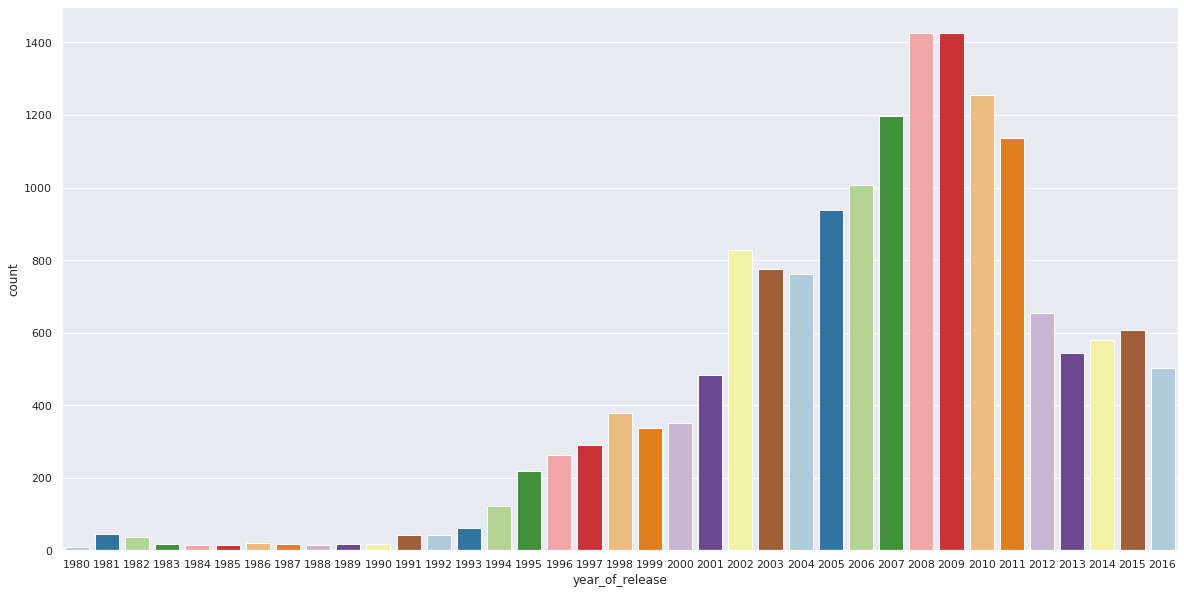

In [252]:
_, __ = plt.subplots(figsize = (20, 10))
__ = sns.barplot(x = summary.index, y = "count", data = summary, palette = "Paired")

как менялись продажи по платформам

In [253]:
# объем продаж для каждой платформы по годам
summary = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
summary.fillna(0, inplace = True)

In [254]:
# средняя продолжительность жизни платформы
# для этого создадим пустой список из количства лет и соберем в него значения
empty=[]
for platform in summary.columns:
    empty.append(summary[platform].ne(0).value_counts().loc[summary[platform].ne(0).value_counts().index == True].values[0])

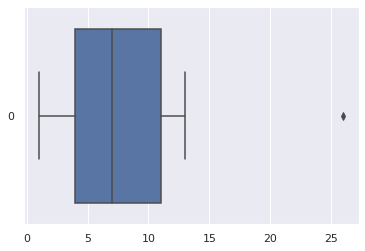

In [255]:
yc = sns.boxplot(data = empty, orient = 'h')

In [256]:
empty = pd.DataFrame(empty, columns = ['lifespan'])

In [257]:
empty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
lifespan    31 non-null int64
dtypes: int64(1)
memory usage: 376.0 bytes


In [258]:
empty.describe()

,lifespan
count,31.000000
mean,7.677419
std,5.081910
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,26.000000


Средняя продолжительность жизни платформы равна 8 лет. Перейдем к топ-10 платформам с максимальными продажами за все время

In [259]:
top10 = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').nlargest(10, 'total_sales')
top10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


рассмотрим как формируются продажи по каждой платформе из топ-10 по годам.
для начала уберем период до 1994 года.

In [260]:
for platform in summary.columns:
    if platform not in top10.index:
        summary.drop(platform, axis = 1, inplace = True)
summary = summary[summary.index >= 1994]
summary

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1994,0.00,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
2000,0.00,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
2001,0.00,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00
2002,0.00,0.00,74.16,6.67,205.38,0.00,0.00,0.00,0.00,0.00


In [261]:
_plot = go.Figure(data = [
    go.Bar(name = 'PS', x = summary.index, y = summary['PS']),
    go.Bar(name = 'PS2', x = summary.index, y = summary['PS2']),
    go.Bar(name = 'PS3', x = summary.index, y = summary['PS3']),
    go.Bar(name = 'PS4', x = summary.index, y = summary['PS4']),
    go.Bar(name = 'PSP', x = summary.index, y = summary['PSP']),
    go.Bar(name = 'DS', x = summary.index, y = summary['DS']),
    go.Bar(name = 'GBA', x = summary.index, y = summary['GBA']), 
    go.Bar(name = 'Wii', x = summary.index, y = summary['Wii']),
    go.Bar(name = 'X360', x = summary.index, y = summary['X360']),
  ])

_plot.update_layout(barmode = 'group')
_plot.show()

Возьмем период 2013-2016 г за интересующий (период характерен активным развитием PS4)

In [262]:
summary = summary[summary.index >= 2013]
_plot = go.Figure(data = [
    go.Bar(name = 'PSP', x = summary.index, y = summary['PSP']),
    go.Bar(name = 'PS3', x = summary.index, y = summary['PS3']),
    go.Bar(name = 'PS4', x = summary.index, y = summary['PS4']),
    go.Bar(name = 'Wii', x = summary.index, y = summary['Wii']),
    go.Bar(name = 'X360', x = summary.index, y = summary['X360']),
])

_plot.update_layout(barmode = 'group')
_plot.show()

PS4 - на вершине успеха, а вот остальные - X360, PS3 - на излете

Глобальные продажи

In [263]:
global_sales = data.query('year_of_release >= 2013')

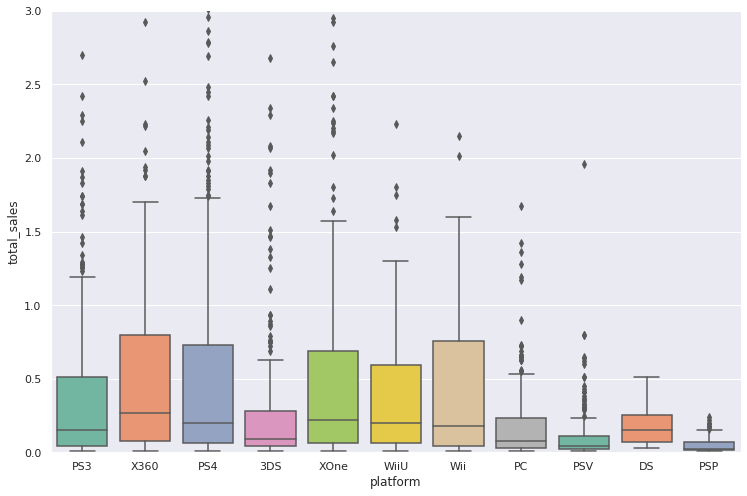

In [264]:
sns.catplot(x = "platform", 
            y = 'total_sales', 
            kind = "box", 
            data = global_sales, 
            orient = 'v', 
            height = 7, 
            aspect = 1.5, 
            palette = 'Set2')
_ = plt.ylim(0, 3)

In [265]:
global_sales.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Лидеры продаж за выбранный нами период 2013-2016 гг. можем отнести PS4, PS3, XOne

In [266]:
# 

import plotly.express as px

fig = px.line(global_sales.pivot_table(index = ['platform', 'year_of_release'], 
                                       values = 'total_sales', aggfunc = 'sum').reset_index(),
             x = 'year_of_release', y = 'total_sales', color = 'platform', 
              title = 'Изменение суммарных продаж с 2013 года')
fig.show()

как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

исследуем как влияют отзывы пользователей и критиков на продажи игр на примере самой популярной игры PS4

In [267]:
# deleted : and (user_score != 0) and (critic_score != 0)
ps4 = global_sales.query('platform == "PS4"')

-0.032
0.407


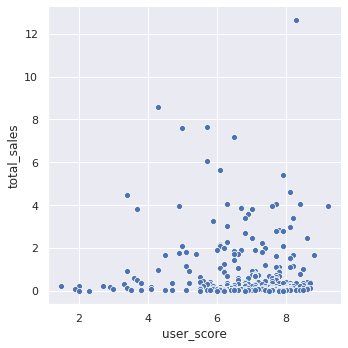

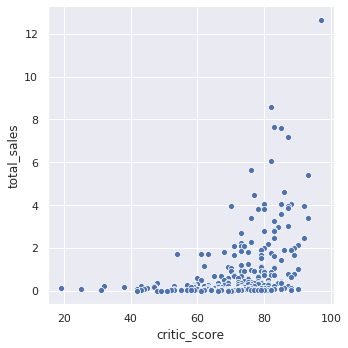

In [268]:
for column in ['user_score', 'critic_score']:
    print(round(ps4[column].corr(ps4['total_sales']), 3))
    sns.relplot(x = column, y = "total_sales", data = ps4)

Судя по коэффициенту корреляции для отзывов пользователей в сравнении с объемом продаж никакой взаимосвязи нет, а по отзывам критиков все же есть = 0.35

Соотнесите выводы с продажами игр на других платформах. Рассмотрим в таком же разрезе и для дргухи платформ


PS3:
Коэффициент корреляции user_score и total_sales: 0.0
Коэффициент корреляции critic_score и total_sales: 0.33

X360:
Коэффициент корреляции user_score и total_sales: -0.01
Коэффициент корреляции critic_score и total_sales: 0.35

Wii:
Коэффициент корреляции user_score и total_sales: 0.68
Коэффициент корреляции critic_score и total_sales: nan

PSP:
Коэффициент корреляции user_score и total_sales: -1.0


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning:

Degrees of freedom <= 0 for slice

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning:

divide by zero encountered in true_divide



Коэффициент корреляции critic_score и total_sales: nan


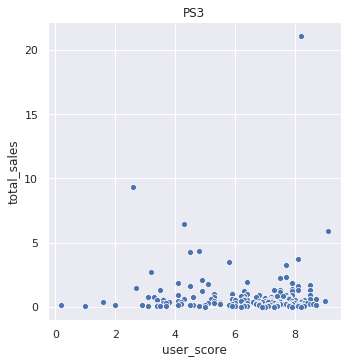

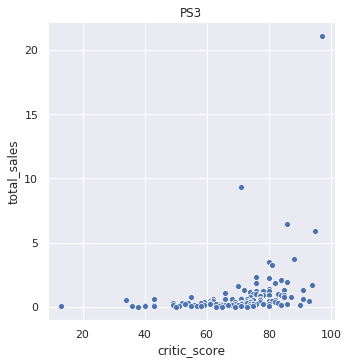

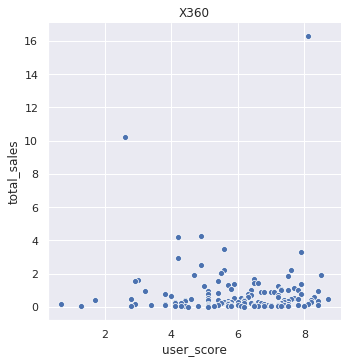

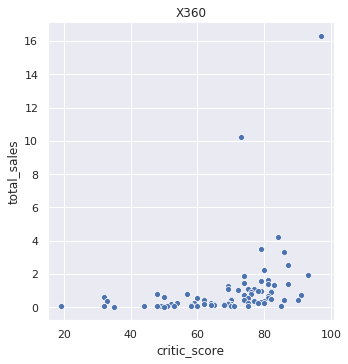

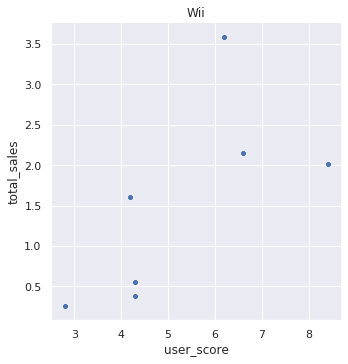

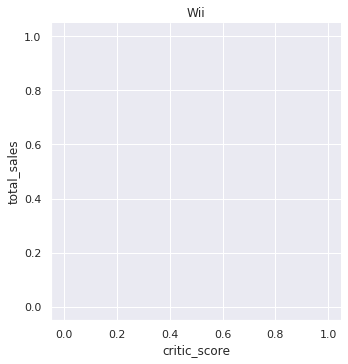

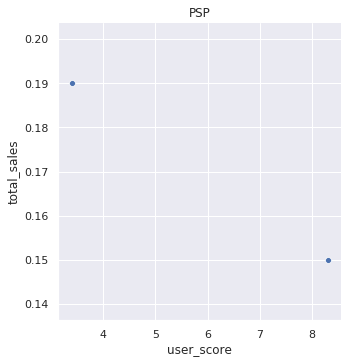

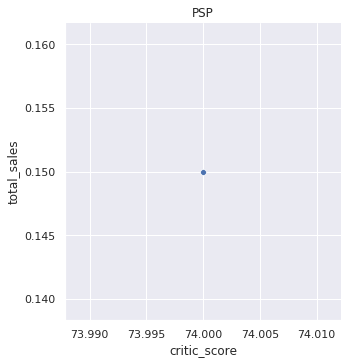

In [269]:
# deleted :  and (user_score != -1) and (critic_score != -1)
for platform in ['PS3', 'X360', 'Wii', 'PSP']:
    print('\n{0}:'.format(platform))
    for column in ['user_score', 'critic_score']:
        temp = global_sales.query('platform == @platform')
        print('Коэффициент корреляции {0} и total_sales: {1}'.\
              format(column, round(temp[column].corr(temp['total_sales']), 2)))
        sns.relplot(x = column, y = "total_sales", data = temp)
        _ = plt.title(platform)

Что можно сказать, результаты схожи, по сути влияние отзывов пользователей на продажи отсутствуют, а вот влияние отзывов критиков на продажи существует

In [270]:
# 

global_sales[['critic_score', 'user_score', 'total_sales']].corr()

# тренд сохраняется

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.313700
user_score,0.502221,1.000000,-0.002608
total_sales,0.313700,-0.002608,1.000000


Посмотрите на общее распределение игр по жанрам.

In [271]:
game_distribution = global_sales.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')
game_distribution.sort_values('total_sales', ascending = False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


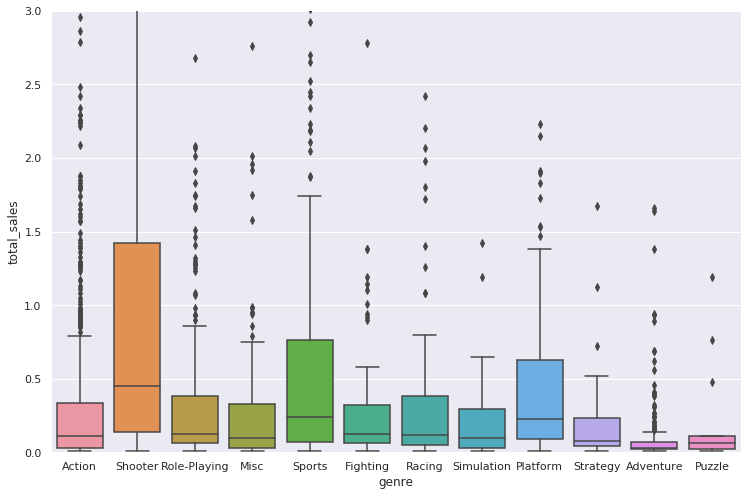

In [272]:
sns.catplot(x = 'genre', y = 'total_sales', kind = 'box', data = global_sales, height = 7, aspect = 1.5)
_ = plt.ylim(0, 3)

Shooter является лидером по продажам, при этом puzzle и adventure не очень популярны, что вполне логично :)

Топ жанры у самывх продаваемых игр за весь период

In [273]:
data.pivot_table(index = ['Name', 'genre'], values = 'total_sales', aggfunc = 'sum').nlargest(10, 'total_sales')

,,total_sales
Name,genre,
Wii Sports,Sports,82.54
Grand Theft Auto V,Action,56.58
Super Mario Bros.,Platform,45.31
Tetris,Puzzle,35.84
Mario Kart Wii,Racing,35.52
Wii Sports Resort,Sports,32.77
Pokemon Red/Pokemon Blue,Role-Playing,31.38
Call of Duty: Modern Warfare 3,Shooter,30.60
New Super Mario Bros.,Platform,29.80


самая продаваемая игра получается из жанра sports, а action на втором месте.

In [274]:
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [275]:
# 

global_sales.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'count')

,total_sales
genre,
Action,766
Adventure,245
Fighting,80
Misc,155
Platform,74
Puzzle,17
Racing,85
Role-Playing,292
Shooter,187


## Портрет пользователя каждого региона

Самые популярные платформы (топ-5) в Европе, Северной Америке и Японии:

In [276]:
usa_top = global_sales.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').nlargest(5, 'na_sales')
usa_top.columns = ['sales']

eu_top = global_sales.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').nlargest(5, 'eu_sales')
eu_top.columns = ['sales']

jp_top = global_sales.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').nlargest(5, 'jp_sales')
jp_top.columns = ['sales']

In [277]:
_plot = go.Figure(data = [
    go.Bar(name = 'North America', x = usa_top.index, y = usa_top['sales']),
    go.Bar(name = 'Europe', x = eu_top.index, y = eu_top['sales']),
    go.Bar(name = 'Japan', x = jp_top.index, y = jp_top['sales']),
])

_plot.update_layout(barmode = 'relative')
_plot.show()

In [278]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = global_sales.pivot_table(index = 'platform', values = column, aggfunc = 'sum').sort_values(column, ascending=False)
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region.nlargest(5, column))

          na_sales  ratio
platform                 
PS4         108.74   0.25
XOne         93.12   0.21
X360         81.66   0.19
PS3          63.50   0.15
3DS          38.20   0.09
          eu_sales  ratio
platform                 
PS4         141.09   0.36
PS3          67.81   0.17
XOne         51.59   0.13
X360         42.52   0.11
3DS          30.96   0.08
          jp_sales  ratio
platform                 
3DS          67.81   0.48
PS3          23.35   0.17
PSV          18.59   0.13
PS4          15.96   0.11
WiiU         10.88   0.08


Можно наблюдать судя по данным, что в Японии совершенно отличающийся набор топ-5 от США и Европы, возможно, в силуразличий в культурных традициях.

Самые популярные жанры (топ-5)

In [279]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = global_sales.pivot_table(index = 'genre', values = column, aggfunc = 'sum').sort_values(column, ascending = False)
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region.nlargest(5, column))

              na_sales  ratio
genre                        
Action          126.05   0.29
Shooter         109.74   0.25
Sports           65.27   0.15
Role-Playing     46.40   0.11
Misc             27.49   0.06
              eu_sales  ratio
genre                        
Action          118.13   0.30
Shooter          87.86   0.22
Sports           60.52   0.15
Role-Playing     36.97   0.09
Racing           20.19   0.05
              jp_sales  ratio
genre                        
Role-Playing     51.04   0.36
Action           40.49   0.29
Misc              9.20   0.07
Fighting          7.65   0.05
Shooter           6.61   0.05


Здесь схожая с играми ситуация - в Японии самый популярный жанр Role-playing, в то время как на Западе этот жанр лишь на 4 месте

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [280]:
for column in ['na_sales', 'eu_sales', 'jp_sales']:
    region = (global_sales[global_sales['rating'] != -1].
              pivot_table(index = 'rating', values = column, aggfunc = 'sum').
              sort_values(column, ascending = False)
             )
    region['ratio'] = round(region[column] / region[column].sum(), 2)
    print(region)

           na_sales  ratio
rating                    
M            165.21   0.38
undefined     89.42   0.20
E             79.05   0.18
E10+          54.24   0.12
T             49.79   0.11
           eu_sales  ratio
rating                    
M            145.32   0.37
E             83.36   0.21
undefined     78.91   0.20
E10+          42.69   0.11
T             41.95   0.11
           jp_sales  ratio
rating                    
undefined     85.05   0.60
T             20.59   0.15
E             15.14   0.11
M             14.11   0.10
E10+           5.89   0.04


В данном случае расхождения сохраняются как и в предыдущих примерах - в США и в Европе популярностью пользуются игры для лиц старше 17 лет, а в /Японии на первом месте игры для подростков. 

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1  — средние пользовательские рейтинги платформ Xbox One и PC различаются.


In [281]:
alpha = 0.05
x_one = global_sales.query('platform == "XOne"')['user_score'].dropna()
pc = global_sales.query('platform == "PC"')['user_score'].dropna()

In [282]:
result = st.ttest_ind(x_one, pc, equal_var = False)

In [283]:
print('p value:', result.pvalue)

p value: 0.14759594013430463


In [284]:
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Исходя из теста гипотезу о равенстве среднего пользовательского рейтинга для Pc и XOne не удалось отвергнуть.

Средние пользовательские рейтинги жанров Action и Sports разные

H0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

H1  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [285]:
alpha = 0.05
action_genre = global_sales.query('genre == "Action"')['user_score'].dropna()
sports_genre = global_sales.query('genre == "Sports"')['user_score'].dropna()

In [286]:
result = st.ttest_ind(action_genre, sports_genre, equal_var = False)

In [287]:
print('p value:', result.pvalue)

p value: 1.4460039700704315e-20


In [288]:
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Исходя из теста гипотезу о равенстве среднего пользовательского рейтинга жанров Action и Sports отвергаем нудевую гипотезу.

## Общий вывод

После проведенного исследования можно сказать, что  у успешного продукта есть несколько характеристик:

по жанру - для Запада Action или Shooter , для Японии Role-Playing.
если речь идет о западном рынке, игра дожна быть на платформе PS4 или XOne, если для Японии на платформе 3DS
на продажи оценки пользователей не оказывают существенного влияния, а вот отзывы критиков играют роль